In [80]:
import matplotlib as mpl
import matplotlib.pyplot as plt

mpl.rcParams['axes.unicode_minus'] = False
plt.style.use("seaborn-v0_8-whitegrid")
plt.rc('font', family='AppleGothic')

import warnings
warnings.filterwarnings(action='ignore')

In [1]:
import pandas as pd

# read_excel to jupyter

In [9]:
_df_raw=pd.read_excel('엑셀로이해하는인공지능2/엑셀로이해하는인공지능_시작파일_220929.xlsx',sheet_name='실거래가2011')

In [10]:
_df_raw.columns

Index(['거래금액', '건축년도', '년', '법정동', '아파트', '월', '일', '전용면적', '지번', '지역코드', '층',
       '해제사유발생일', '해제여부'],
      dtype='object')

# EDA
1. remove some columns
2. descriptive statistics
3. histogram
4. boxplot

In [11]:
df=_df_raw.loc[:,['거래금액', '건축년도', '전용면적', '층']]

In [33]:
# count, mean, std, quatile, min, max
_statistics=df.describe()
df.describe()

,거래금액,건축년도,전용면적,층
count,318.000000,318.000000,318.000000,318.000000
mean,97886.477987,2003.962264,81.492287,7.569182
std,58880.705817,9.532205,41.819365,4.834803
min,7500.000000,1971.000000,12.010000,-1.000000
25%,54000.000000,1999.000000,59.085000,4.000000
50%,87250.000000,2004.000000,84.477050,7.000000
75%,139800.000000,2009.000000,92.575000,11.000000
max,375000.000000,2020.000000,238.858000,25.000000


In [40]:
# skew 왜도 , kurtosis 첨도
from scipy.stats import skew, kurtosis
# 왜도
print(skew(df))
# 첨도
print(kurtosis(df))

[ 0.72617384 -0.85101897  0.95633081  0.76197713]
[1.37705382 1.71308023 1.41646438 0.0072557 ]


In [63]:
statistics=pd.concat([_statistics,
                      pd.DataFrame(skew(df).reshape(1,4),index=['skew'],columns=_statistics.columns),
                      pd.DataFrame(kurtosis(df).reshape(1,4),index=['kurtosis'],columns=_statistics.columns)],
                      ignore_index=False)

In [64]:
statistics

,거래금액,건축년도,전용면적,층
count,318.000000,318.000000,318.000000,318.000000
mean,97886.477987,2003.962264,81.492287,7.569182
std,58880.705817,9.532205,41.819365,4.834803
min,7500.000000,1971.000000,12.010000,-1.000000
25%,54000.000000,1999.000000,59.085000,4.000000
50%,87250.000000,2004.000000,84.477050,7.000000
75%,139800.000000,2009.000000,92.575000,11.000000
max,375000.000000,2020.000000,238.858000,25.000000
skew,0.726174,-0.851019,0.956331,0.761977
kurtosis,1.377054,1.713080,1.416464,0.007256


histogram

array([[<AxesSubplot: title={'center': '거래금액'}>,
        <AxesSubplot: title={'center': '건축년도'}>],
       [<AxesSubplot: title={'center': '전용면적'}>,
        <AxesSubplot: title={'center': '층'}>]], dtype=object)

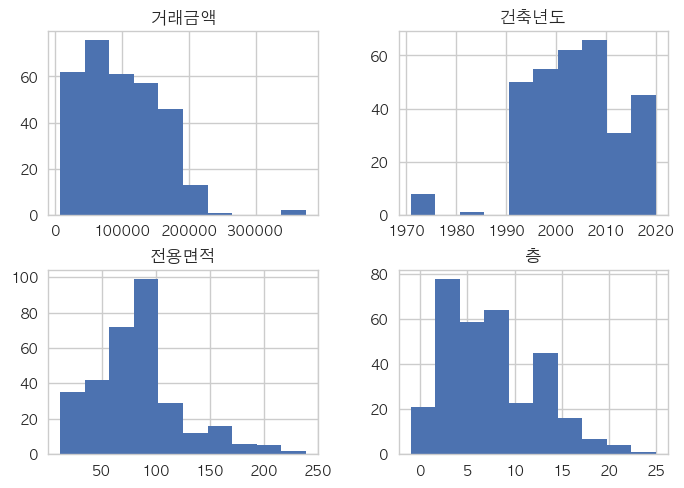

In [81]:
df.hist()